In [1]:
import librosa
import librosa.display
import moviepy.editor as mp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_audio_features(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # Extract audio features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)[0]
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    return chroma_stft, mfccs, rms, spectral_contrast

In [3]:
def plot_audio_features(chroma_stft, mfccs, rms, spectral_contrast, title='Audio Features'):
    # Plot Chroma STFT
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma STFT')

    # Plot MFCCs
    plt.subplot(3, 1, 2)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title('MFCCs')
    
    # Plot Spectral Contrast
    plt.subplot(4, 1, 3)
    librosa.display.specshow(spectral_contrast, x_axis='time')
    plt.colorbar()
    plt.title('Spectral Contrast')

    # Plot RMS
    plt.subplot(3, 1, 3)
    plt.plot(rms, label='RMS Energy')
    plt.title('RMS Energy')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [4]:
def initiate_plot(video_path):
    # Extract audio from video
    audio_path = 'temp_audio.wav'
    video_clip = mp.VideoFileClip(video_path)
    video_clip.audio.write_audiofile(audio_path, fps=video_clip.fps)

    # Extract and plot audio features
    chroma_stft, mfccs, rms, spectral_contrast = extract_audio_features(audio_path)
    plot_audio_features(chroma_stft, mfccs, rms, spectral_contrast)
    

MoviePy - Writing audio in temp_audio.wav


MoviePy - Done.


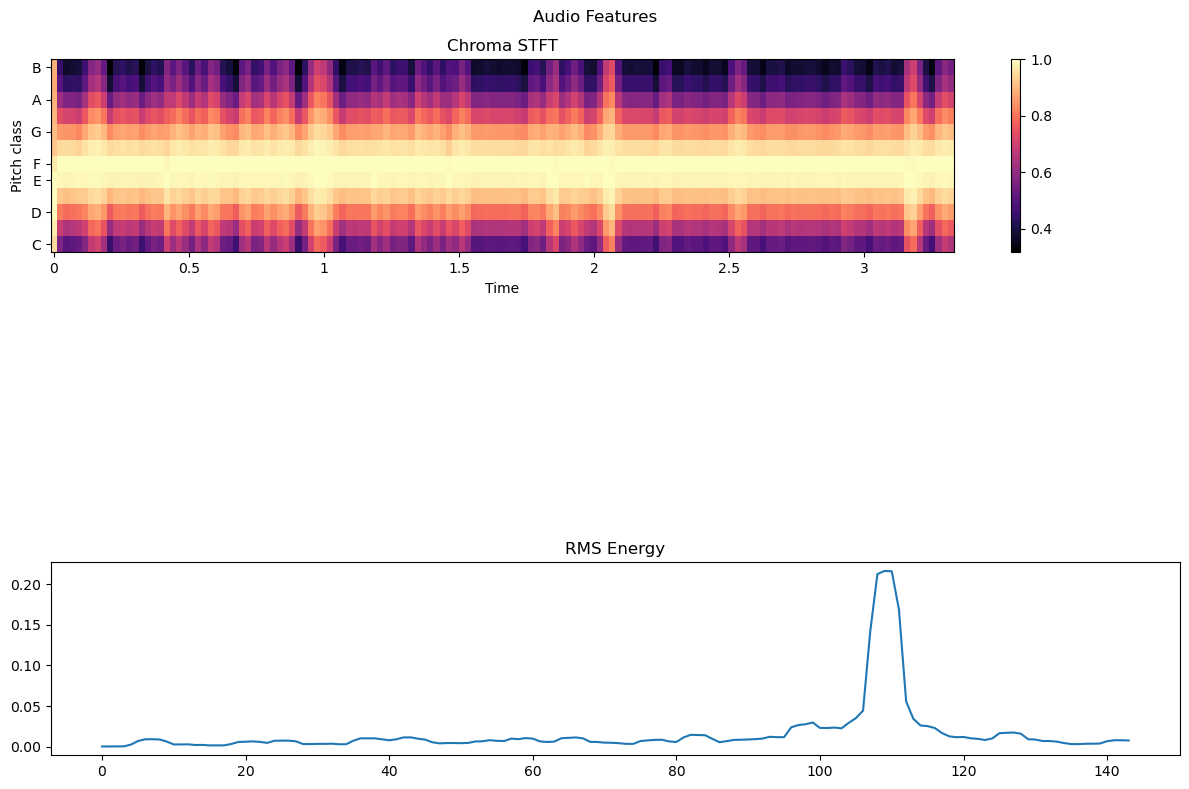

In [5]:
video_path = "../Media/positive_samples/hit_2.mp4"
initiate_plot(video_path)

